NAME = SHYAM KUMAR RAJPOOT

COURSE = MCA

DOMAIN = DATA SCIENCE

TASK = EMAIL SPAM DETECTION

Batch - MAY Phase 2 AICTE OIB-SIP 2024.


In [261]:
# import usefull libraries for manipulation and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords


#for converting text to vectors
from sklearn.feature_extraction.text import TfidfVectorizer

# for training,selecting,and Evaluating
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [262]:
# import data set
df = pd.read_csv('/content/sample_data/spam.csv', encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [264]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [265]:
# check column list
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [266]:
# null value count
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [267]:
# percentage of null values
df.isnull().mean()*100

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

In [268]:
# missing values in unnamed-2, unnamed-3,unnmaed-4 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4' ],inplace=True)

In [269]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [270]:
# rename of cols
df.rename(columns={'v1':'Target','v2':'Text'}, inplace= True)

In [271]:
df

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [272]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [273]:
df['Target']= encoder.fit_transform(df['Target'])

In [274]:
df.head()
# where 0=Ham and 1=Spam

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [275]:
# FOR check missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [276]:
# FOR duplicated values
df.duplicated().sum()

403

In [277]:
# removing duplicate values
df = df.drop_duplicates(keep="first")

In [278]:
df.duplicated().sum()

0

In [279]:
df.shape

(5169, 2)

 Exploratory Data Analysis and Visualizations

In [280]:
df

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [281]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

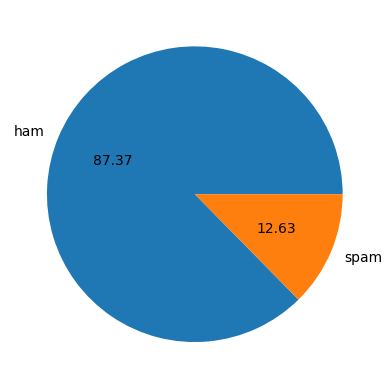

In [282]:
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

Above distribution data is imbalanced


1 - Now analysis for how many alphabet,word  and sentences are used in email.
2 - and next for deeper analysis creating 3 col
First-no of charactors in mail
Second - number of woards in mail
third - and number of sentences in email

In [283]:
#(Natural Language Toolkit )
!pip install nltk

In [284]:
# no of charactor in email
df['Text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: Text, Length: 5169, dtype: int64

In [285]:
pd.set_option("mode.copy_on_write", True)

In [286]:
df['num_characters'] = df['Text'].apply(len)

In [287]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [288]:
# no of words
df['Text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5169, dtype: object

In [289]:
# length of each List
df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: Text, Length: 5169, dtype: int64

In [290]:
#no of words in new col by using num_words
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [291]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [292]:
# mumber of sentences in single mail
df['Text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Text, Length: 5169, dtype: object

In [293]:
# length of each sentences
df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: Text, Length: 5169, dtype: int64

In [294]:
#store in new col (num_sentences)
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [295]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [296]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [297]:
# analyze ham email
df[df['Target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [298]:
# analyze spam email
df[df['Target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [299]:
pd.option_context('mode.use_inf_as_na', True)

In [300]:
#df.dtypes

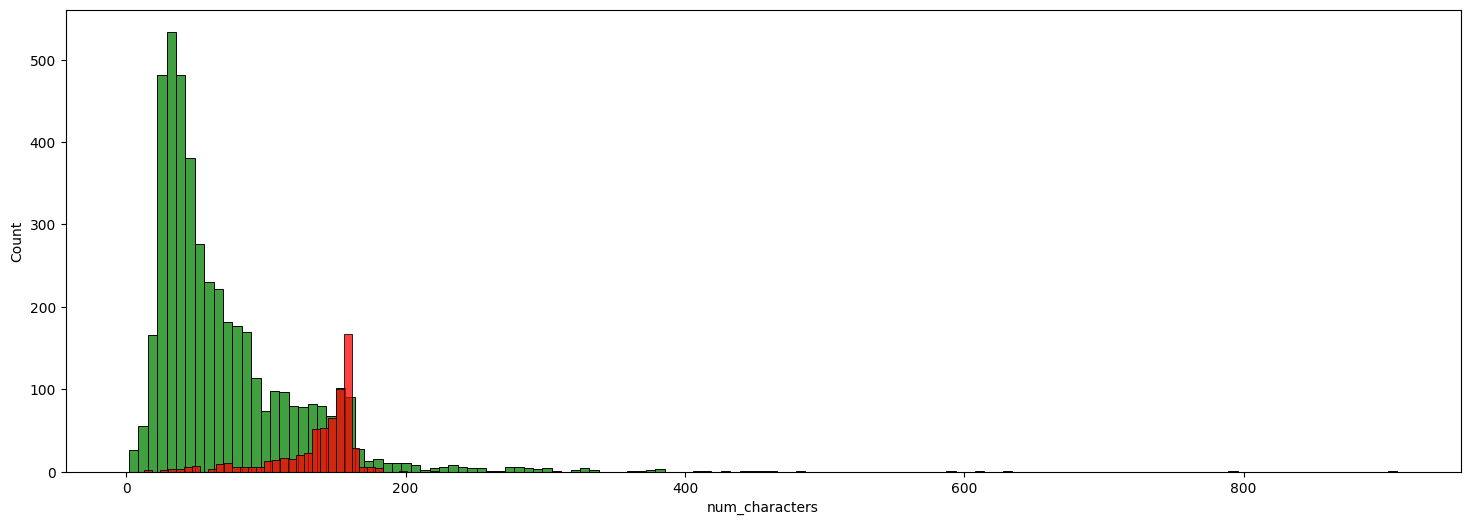

In [301]:
#
plt.figure(figsize=(18,6))
sns.histplot(df[df['Target'] == 0]['num_characters'], color='green')
sns.histplot(df[df['Target'] == 1]['num_characters'], color='red')
plt.show()

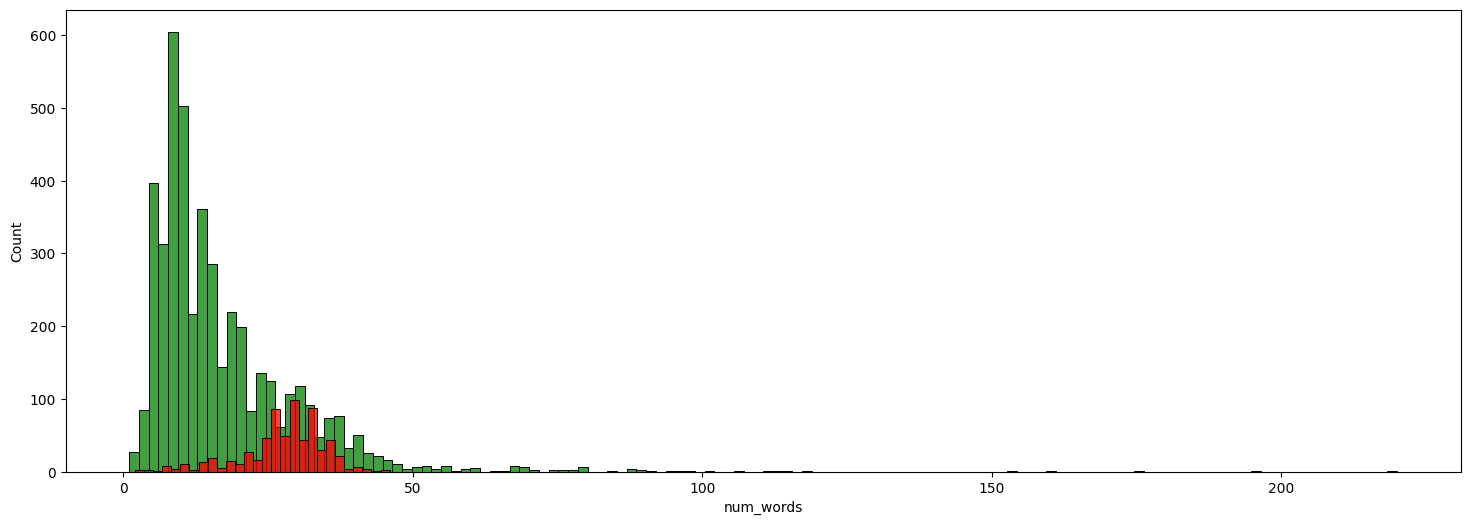

In [302]:
plt.figure(figsize=(18,6))
sns.histplot(df[df['Target'] ==0]['num_words'], color='green')
sns.histplot(df[df['Target'] ==1]['num_words'], color= 'red')
plt.show()

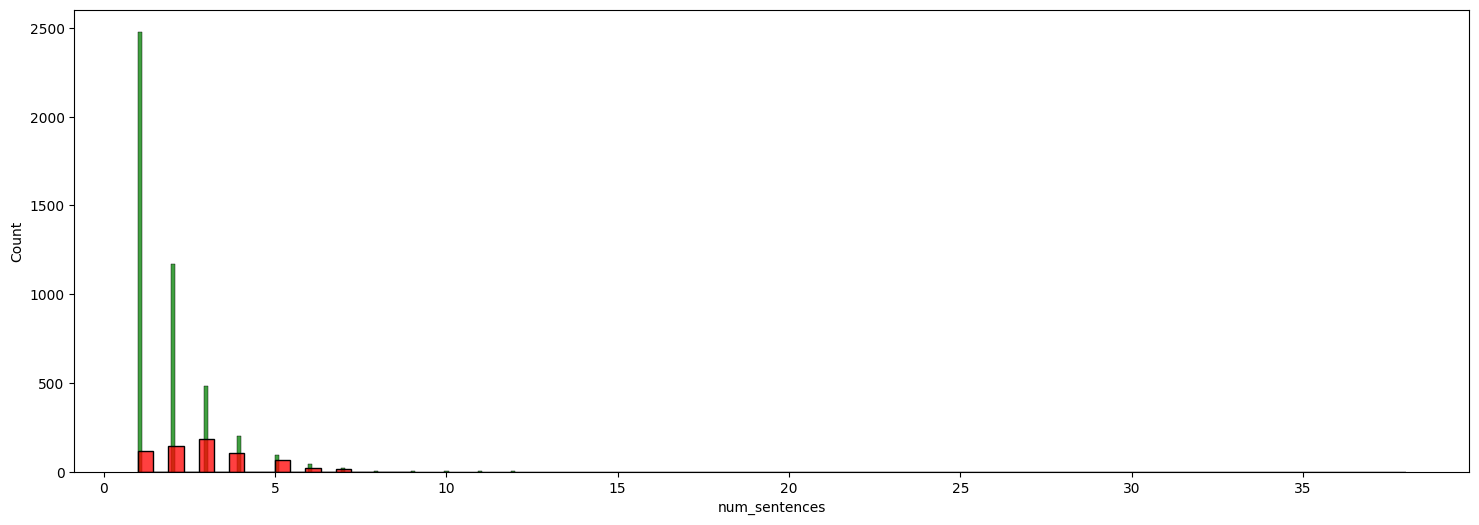

In [303]:
plt.figure(figsize=(18,6))
sns.histplot(df[df['Target'] ==0]['num_sentences'], color='green')
sns.histplot(df[df['Target'] ==1]['num_sentences'], color= 'red')
plt.show()

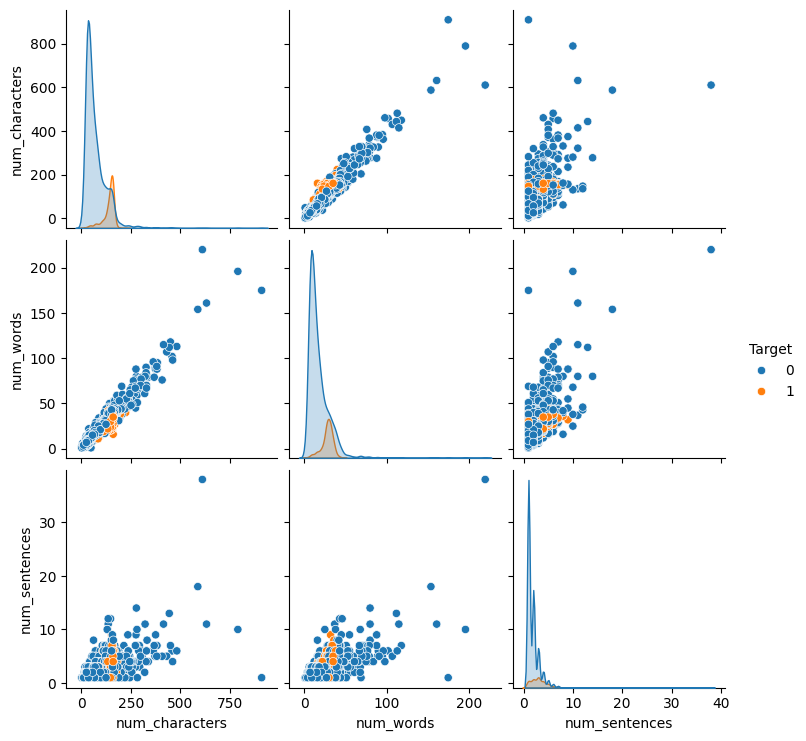

In [304]:
sns.pairplot(df, hue='Target')

perform text Preprocessing


In [305]:
def transform_text1(text1):
  text1 = text1.lower()
  return text1

In [306]:
transform_text1('SHYAM KUMAR RAJPPOT')

'shyam kumar rajppot'

In [307]:
# Tokenizing
def transform_text2(text2):
  text2 = nltk.word_tokenize(text2)
  return text2

In [308]:
transform_text2('SHYAM KUMAR RAJPOOT')

['SHYAM', 'KUMAR', 'RAJPOOT']

In [309]:
def transform_text3(text3):
  y=[]
  for i in text3:
    if i.isalnum():
      y.append(i)
  return y

In [310]:
transform_text3('S@h#y2A1M')

['S', 'h', 'y', '2', 'A', '1', 'M']

In [311]:
def transform_text3a(text3a):
  text3a = text3a.lower()
  text3a = nltk.word_tokenize(text3a)
  y_a=[]
  for i in text3a:
    if i.isalnum():
      y_a.append(i)
  return y_a

In [312]:
transform_text3a('HI how Are % @ 20 45* You')

['hi', 'how', 'are', '20', '45', 'you']

In [313]:
# stemming
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [314]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [315]:
def transform_text4(text4):
  text4 = text4.lower()
  text4 = nltk.word_tokenize(text4)
  y_4=[]
  for i in text4:
    if i.isalnum():
      y_4.append(i)
  text4 = y_4[:]
  y_4.clear()
  for i in text4:
    if i not in stopwords.words('english') and  i not in string.punctuation:
      y_4.append(i)
  return y_4

In [316]:
transform_text4('hi how  are % @ 20 45* you shyam?')

['hi', '20', '45', 'shyam']

In [317]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [318]:
def transform_text5(text5):
  text5 = text5.lower()
  text5 = nltk.word_tokenize(text5)
  y_5= []
  for i in text5:
    if i.isalnum():
      y_5.append(i)
      text5 = y_5[:]
      y_5.clear()
      for i in text5:
        if i not in stopwords.words('english') and i not in string.punctuation:
          y_5.append(i)
          text5 = y_5[:]
          y_5.clear()
          for i in text5:
            y_5.append(ps.stem(i))
            return " " .join(y_5)

In [319]:
df['Text'][200]

'I sent you  &lt;#&gt;  bucks'

In [320]:
transform_text5('I sent you  &lt;#&gt;  bucks')

'sent'

In [321]:
df['Text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [322]:
transform_text5('But i ll b going 2 sch on mon. My sis need 2 take smth')

'b'

                                           **NOW**

In [323]:
!pip install PorterStemmer

In [324]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [325]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    # Remove non-alphanumeric characters
    text = [i for i in text if i.isalnum()]

    # Remove stopwords and punctuation
    text = [i for i in text if i not in stopwords.words('english') and i not in string.punctuation]

    # Stemming
    ps = PorterStemmer()
    text = [ps.stem(i) for i in text]

    return " ".join(text)

df['Text'] = df['Text'].apply(transform_text)

In [326]:
df['Text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth el next...
5571                                       rofl true name
Name: Text, Length: 5169, dtype: object

In [327]:
df['Transformed_Text'] = df['Text'].apply(transform_text)

In [328]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_Text
0,0,go jurong point crazi avail bugi n great world...,111,24,2,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni,29,8,2,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor u c alreadi say,49,13,1,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though,61,15,1,nah think goe usf live around though


In [329]:
!pip install wordcloud

In [330]:
!pip install --upgrade wordcloud

In [331]:
!pip install pillow

In [332]:
!pip install --upgrade pillow

In [333]:
from wordcloud import WordCloud
from PIL import Image , ImageDraw, ImageFont
wc = WordCloud(width=800, height=800, min_font_size=10, background_color='white')

In [334]:
df['Target']==1

0       False
1       False
2        True
3       False
4       False
        ...  
5567     True
5568    False
5569    False
5570    False
5571    False
Name: Target, Length: 5169, dtype: bool

In [335]:
df[df['Target']==1]

,Target,Text,num_characters,num_words,num_sentences,Transformed_Text
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,freemsg hey darl 3 week word back like fun sti...,148,39,4,freemsg hey darl 3 week word back like fun sti...
8,1,winner valu network custom select receivea pri...,158,32,5,winner valu network custom select receivea pri...
9,1,mobil 11 month u r entitl updat latest colour ...,154,31,3,mobil 11 month u r entitl updat latest colour ...
11,1,six chanc win cash 100 pound txt csh11 send co...,136,31,3,six chanc win cash 100 pound txt csh11 send co...
...,...,...,...,...,...,...
5537,1,want explicit sex 30 sec ring 02073162414 cost...,90,18,3,want explicit sex 30 sec ring 02073162414 cost...
5540,1,ask 3mobil 0870 chatlin inclu free min india c...,160,38,6,ask 3mobil 0870 chatlin inclu free min india c...
5547,1,contract mobil 11 mnth latest motorola nokia e...,160,35,5,contract mobil 11 mnth latest motorola nokia e...
5566,1,remind o2 get pound free call credit detail gr...,147,30,1,remind o2 get pound free call credit detail gr...


In [336]:
df[df['Target']==1]['Transformed_Text']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: Transformed_Text, Length: 653, dtype: object

In [337]:
df[df['Target']==1]['Transformed_Text'].str .cat(sep=" ")

'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18 freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030 six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt messag click http england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq thank subscript rington uk mobil charg plea confirm repli ye repli charg 07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord plea call 08000930705 deliveri tomorrow sm ac sptv new jersey devil detroit red win

In [338]:
wc.generate(df[df['Target']==1]['Transformed_Text'].str.cat(sep=" "))

In [339]:
spam_wc = wc.generate(df[df['Target']==1]['Transformed_Text'] .str.cat(sep=" "))

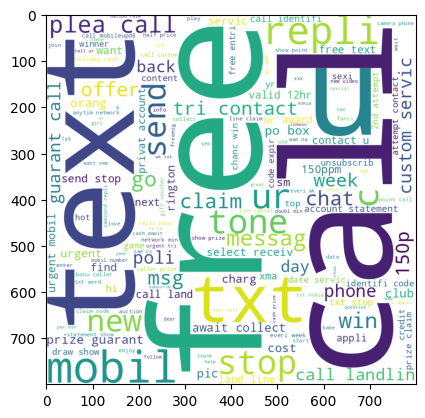

In [340]:
plt.imshow(spam_wc)

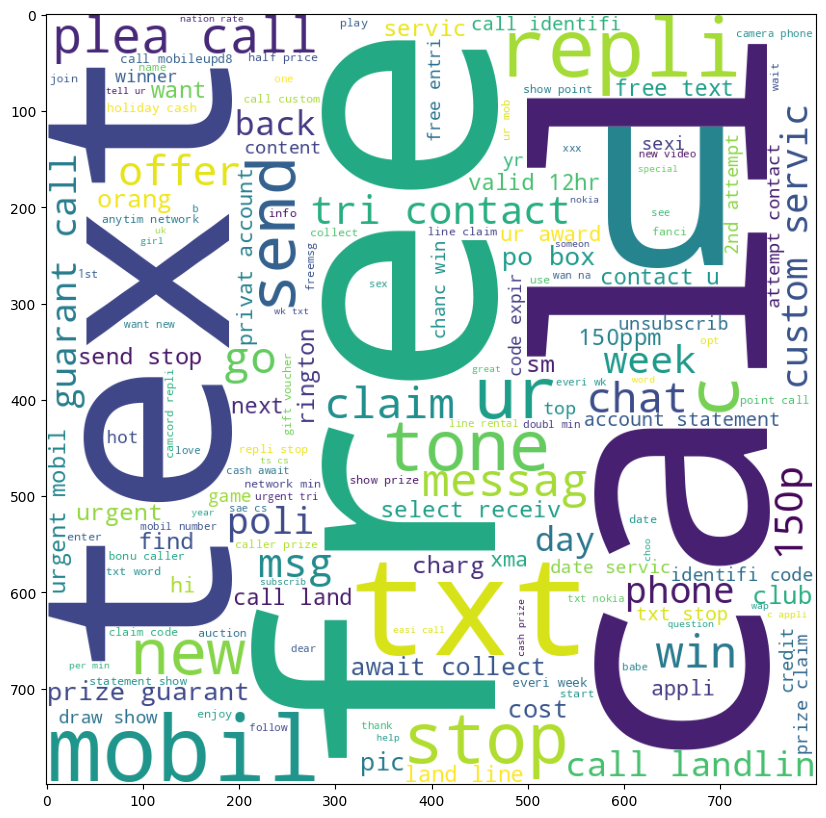

In [341]:
plt.figure(figsize=(18,10))
plt.imshow(spam_wc)

In [342]:
ham_wc = wc.generate(df[df['Target']==0]['Transformed_Text'].str.cat(sep=" "))

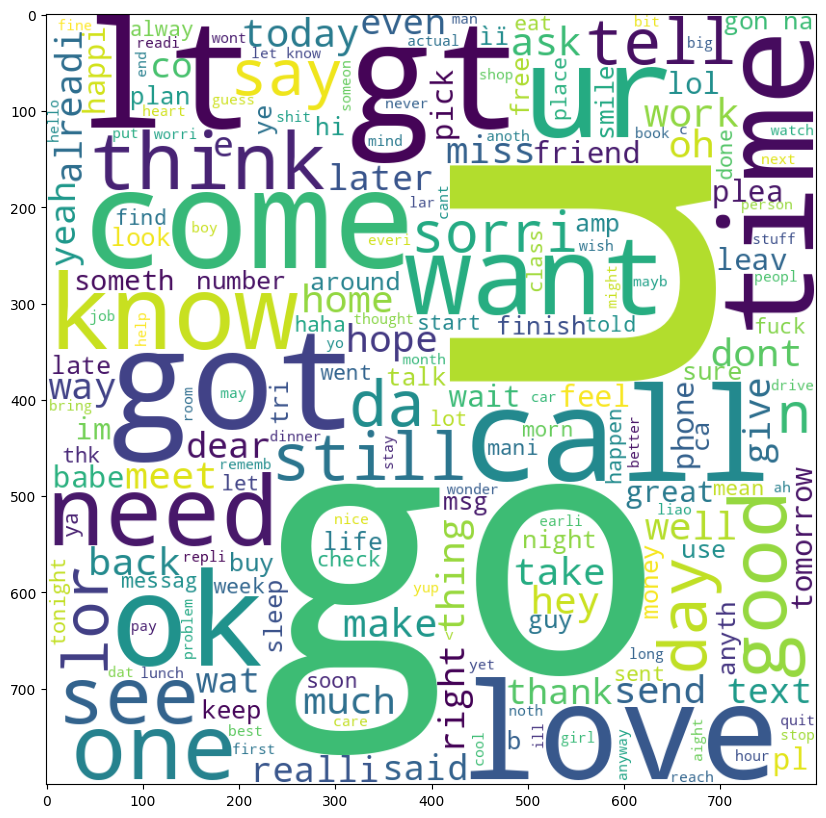

In [343]:
plt.figure(figsize=(18,10))
plt.imshow(ham_wc)

In [344]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_Text
0,0,go jurong point crazi avail bugi n great world...,111,24,2,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni,29,8,2,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor u c alreadi say,49,13,1,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though,61,15,1,nah think goe usf live around though


In [345]:
# top 30 word in spam(Target=1)/in series form
df[df['Target']==1]['Transformed_Text']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: Transformed_Text, Length: 653, dtype: object

In [346]:
df[df['Target']==0]['Transformed_Text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
6           even brother like speak treat like aid patent
                              ...                        
5565                                              huh lei
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth el next...
5571                                       rofl true name
Name: Transformed_Text, Length: 4516, dtype: object

In [347]:
df[df['Target']==1]['Transformed_Text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg plea confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord plea call 08000930705 deliveri tomorrow',
 'sm

In [348]:
df[df['Target']==0]['Transformed_Text'].tolist()

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'even brother like speak treat like aid patent',
 'per request mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'gon na home soon want talk stuff anymor tonight k cri enough today',
 'search right word thank breather promi wont take help grant fulfil promi wonder bless time',
 'date sunday',
 'oh k watch',
 'eh u rememb 2 spell name ye v naughti make v wet',
 'fine thatåõ way u feel thatåõ way gota b',
 'seriou spell name',
 'go tri 2 month ha ha joke',
 'pay first lar da stock comin',
 'aft finish lunch go str lor ard 3 smth lor u finish ur lunch alreadi',
 'ffffffffff alright way meet sooner',
 'forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol',
 'lol alway convinc',
 'catch bu fri egg make tea eat mom left dinner feel love',


In [349]:
# msg of spam
for msg in df[df['Target']==1]['Transformed_Text'].tolist():
  print(msg)

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg plea confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord plea call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wing

In [350]:
for msg in df[df['Target']==0]['Transformed_Text'].tolist():
  print(msg)

go jurong point crazi avail bugi n great world la e buffet cine got amor wat
ok lar joke wif u oni
u dun say earli hor u c alreadi say
nah think goe usf live around though
even brother like speak treat like aid patent
per request mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun
gon na home soon want talk stuff anymor tonight k cri enough today
search right word thank breather promi wont take help grant fulfil promi wonder bless time
date sunday
oh k watch
eh u rememb 2 spell name ye v naughti make v wet
fine thatåõ way u feel thatåõ way gota b
seriou spell name
go tri 2 month ha ha joke
pay first lar da stock comin
aft finish lunch go str lor ard 3 smth lor u finish ur lunch alreadi
ffffffffff alright way meet sooner
forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol
lol alway convinc
catch bu fri egg make tea eat mom left dinner feel love
back amp pack car let know room
ahhh work vagu rememb feel like lol
wait still c

In [351]:
# spit each word by using - msg.split()
for msg in df[df['Target']==1]['Transformed_Text'].tolist():
  print(msg .split())

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18']
['freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv']
['winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour']
['mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030']
['six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info']
['urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18']
['xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'c

In [352]:
for msg in df[df['Target']==0]['Transformed_Text'].tolist():
  print(msg .split())

['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat']
['ok', 'lar', 'joke', 'wif', 'u', 'oni']
['u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say']
['nah', 'think', 'goe', 'usf', 'live', 'around', 'though']
['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent']
['per', 'request', 'mell', 'oru', 'minnaminungint', 'nurungu', 'vettam', 'set', 'callertun', 'caller', 'press', '9', 'copi', 'friend', 'callertun']
['gon', 'na', 'home', 'soon', 'want', 'talk', 'stuff', 'anymor', 'tonight', 'k', 'cri', 'enough', 'today']
['search', 'right', 'word', 'thank', 'breather', 'promi', 'wont', 'take', 'help', 'grant', 'fulfil', 'promi', 'wonder', 'bless', 'time']
['date', 'sunday']
['oh', 'k', 'watch']
['eh', 'u', 'rememb', '2', 'spell', 'name', 'ye', 'v', 'naughti', 'make', 'v', 'wet']
['fine', 'thatåõ', 'way', 'u', 'feel', 'thatåõ', 'way', 'gota', 'b']
['seriou', 'spell', 'name']
['go', 'tri', '2', 'mont

In [353]:
# after splitting each word create spam_corpus empty list and append in spam corpus
spam_corpus=[]
for msg in df[df['Target']==1]['Transformed_Text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [354]:
ham_corpus=[]
for msg in df[df['Target']==0]['Transformed_Text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [355]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [356]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promi',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promi',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'way'

In [357]:
# creating dictionary for each word
# counter --> it's a dictionary that stores objects as keys and counts as values.
from collections import Counter
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [358]:
from collections import Counter
Counter(ham_corpus)

Counter({'go': 404,
         'jurong': 1,
         'point': 17,
         'crazi': 10,
         'avail': 13,
         'bugi': 7,
         'n': 120,
         'great': 97,
         'world': 28,
         'la': 7,
         'e': 77,
         'buffet': 2,
         'cine': 7,
         'got': 236,
         'amor': 1,
         'wat': 108,
         'ok': 217,
         'lar': 38,
         'joke': 14,
         'wif': 27,
         'u': 883,
         'oni': 4,
         'dun': 55,
         'say': 127,
         'earli': 33,
         'hor': 3,
         'c': 57,
         'alreadi': 90,
         'nah': 10,
         'think': 149,
         'goe': 26,
         'usf': 10,
         'live': 25,
         'around': 59,
         'though': 26,
         'even': 77,
         'brother': 17,
         'like': 234,
         'speak': 24,
         'treat': 19,
         'aid': 2,
         'patent': 1,
         'per': 9,
         'request': 6,
         'mell': 1,
         'oru': 2,
         'minnaminungint': 1,
         'nur

In [359]:
# most comman word in spam msg.
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('plea', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [360]:
from collections import Counter
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [361]:
# most common word in dataframe
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [362]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


 **building model**

In [363]:
# converting text to numeric data.
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [364]:
df.columns.to_list()

['Target',
 'Text',
 'num_characters',
 'num_words',
 'num_sentences',
 'Transformed_Text']

In [402]:
X= cv.fit_transform(df['Transformed_Text']).toarray()

In [403]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [367]:
X.shape

(5169, 6661)

In [401]:
 Y = df['Target'].values

In [369]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [370]:
from sklearn.model_selection import train_test_split

In [371]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [372]:
#precision is a metrix used to evaluate the performence of classification model
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

The precision score is calculated by following formula

precision = True Positives/(True Positives + False Positive)
 The precision score ranges from 0 to 1


In [373]:
# it is a classification technique in ML
gnb = GaussianNB()

In [374]:
#it is widely used for assigning document to class based on the statistical analysis of their contents.
mnb = MultinomialNB()


In [375]:
bnb = BernoulliNB()

In [376]:
gnb.fit(X_train, Y_train)
Y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred_gnb))
print(confusion_matrix(Y_test, Y_pred_gnb))
print(precision_score(Y_test, Y_pred_gnb))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [377]:
mnb.fit(X_train, Y_train)
Y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred_mnb))
print(confusion_matrix(Y_test, Y_pred_mnb))
print(precision_score(Y_test, Y_pred_mnb))

0.965183752417795
[[872  24]
 [ 12 126]]
0.84


In [378]:
bnb.fit(X_train, Y_train)
Y_pred_bnb = bnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred_bnb))
print(confusion_matrix(Y_test, Y_pred_bnb))
print(precision_score(Y_test, Y_pred_bnb))

0.9709864603481625
[[893   3]
 [ 27 111]]
0.9736842105263158


In [379]:
# TfidfVectorizer() = it is a feature extraction technique commonly used in natural language processing(NPL)
#Tf-IDF (trem frequency-Inverse Document Frequency) it is a numerical statistic that reflects the importance of a word in a document relative to the entire corpus .
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

tf =(frequency of term 't' in document 'd')/(total terms in document 'd' )

idf = log 10 ((total number of documents)/(total documents with term 't'))

In [380]:
X_tfidf = tfidf.fit_transform(df['Transformed_Text']).toarray()

In [381]:
X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [382]:
X_tfidf.shape

(5169, 6661)

In [383]:
Y_tfidf = df['Target'].values

In [384]:
Y_tfidf

array([0, 0, 1, ..., 0, 0, 0])

In [385]:
Y_tfidf.shape

(5169,)

In [386]:
from sklearn.model_selection import train_test_split
X_train_tfidf, X_test_tfidf, Y_train_tfidf, Y_test_tfidf = train_test_split(X_tfidf, Y_tfidf, test_size=0.2, random_state=2)


In [387]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [388]:
gnb.fit(X_train_tfidf, Y_train_tfidf)
Y_pred_gnb_tfidf = gnb.predict(X_test_tfidf)
print(accuracy_score(Y_test_tfidf, Y_pred_gnb_tfidf))
print(confusion_matrix(Y_test_tfidf, Y_pred_gnb_tfidf))
print(precision_score(Y_test_tfidf, Y_pred_gnb_tfidf))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [389]:
mnb.fit(X_train_tfidf, Y_train_tfidf)
Y_pred_mnb_tfidf = mnb.predict(X_test_tfidf)
print(accuracy_score(Y_test_tfidf, Y_pred_mnb_tfidf))
print(confusion_matrix(Y_test_tfidf, Y_pred_mnb_tfidf))
print(precision_score(Y_test_tfidf, Y_pred_mnb_tfidf))


0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [390]:
bnb.fit(X_train_tfidf, Y_train_tfidf)
Y_pred_bnb_tfidf = bnb.predict(X_test_tfidf)
print(accuracy_score(Y_test_tfidf, Y_pred_bnb_tfidf))
print(confusion_matrix(Y_test_tfidf, Y_pred_gnb_tfidf))
print(precision_score(Y_test_tfidf, Y_pred_bnb_tfidf))


0.9709864603481625
[[793 103]
 [ 25 113]]
0.9736842105263158


In [394]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, Y_train)

MultinomialNB()

In [416]:
def predict():
  message = input("Enter the message:")
  data = cv.transform([message]).toarray()
  prediction = model.predict(data)
  if prediction == 1:
    print("spam mail")
  else:
    print("not spam")
  return prediction

In [424]:
predict()

Enter the message:offer
spam mail


array([1])